In [ ]:
%matplotlib inline


# Blob Detection


Blobs are bright on dark or dark on bright regions in an image. In
this example, blobs are detected using 2 algorithms. 

Laplacian of Gaussian (LoG)
-----------------------------
This is the most accurate and slowest approach. It computes the Laplacian
of Gaussian images with successively increasing standard deviation and
stacks them up in a cube. Blobs are local maximas in this cube. Detecting
larger blobs is especially slower because of larger kernel sizes during
convolution. Only bright blobs on dark backgrounds are detected. See
:py:meth:`skimage.feature.blob_log` for usage.

Difference of Gaussian (DoG)
----------------------------
This is a faster approximation of LoG approach. In this case the image is
blurred with increasing standard deviations and the difference between
two successively blurred images are stacked up in a cube. This method
suffers from the same disadvantage as LoG approach for detecting larger
blobs. Blobs are again assumed to be bright on dark. See
:py:meth:`skimage.feature.blob_dog` for usage.

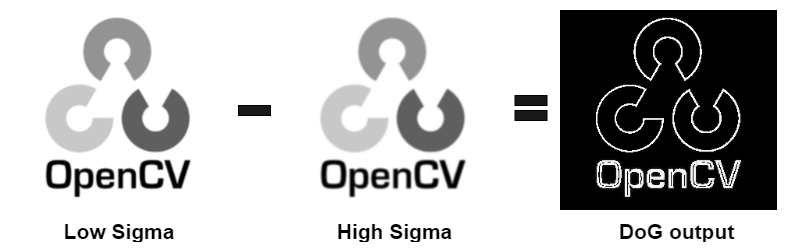




In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log
from skimage.color import rgb2gray
import matplotlib.pyplot as plt



image = data.camera()
image_gray = rgb2gray(image)
fig, ax = plt.subplots(figsize=(8, 4), sharex=True, sharey=True)
ax.axis('off')
ax.imshow(image,cmap=plt.cm.gray)
ax.set_title('Input image')
plt.tight_layout()
plt.show()

#Laplacian of Gaussian (LoG)
#Scale invariant Interest points are local maxima in both position and scale.
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)


#Difference of Gaussian (DoG)
blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)



blobs_list = [blobs_log, blobs_dog]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image,cmap=plt.cm.gray)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

#### Experiment 1: Blob detection using scikit-image

ให้นิสิตทำการ detect หา blob จากภาพ grayscale ที่กำหนดให้ โดยใช้ วิธีการ Difference of Gaussian (DoG) method. และทำการ บอกจำนวนของ วัตถุนั้นๆ (Farm) ว่าสามารถตรวจจับได้ทั้งหมดเป็นเท่าไหร่

กำหนดให้ 
- min_sigma = 4
- max_sigma = 8
- threshold = 0.1
- overlap = 0.6

In [ ]:
#import library
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log
from skimage.color import rgb2gray
from skimage import feature, color
import matplotlib.pyplot as plt

import cv2


#input image

image  = cv2.imread('images/farm.jpg') 
image  = color.rgb2gray(image)



#### Start Your Code here using the Difference of Gaussian (DoG) method. ####

# Difference of Gaussian (DoG)
blobs_dog = blob_dog(image, min_sigma=4, max_sigma=8, threshold=0.1, overlap = 0.6)

#### End Your Code ####


fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1)

for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r+1, color='red', linewidth=2, fill=False)
    ax.add_patch(c)

   


plt.imshow(image,cmap=plt.cm.gray)
plt.title('Center Pivot Farms')
plt.tight_layout()
plt.show()
print('Number of center pivot farms detected: ' + str(len(blobs_dog)))


